In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 25.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
import pandas as pd

# Use the correct path to the CSV file
csv_path = "/root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the data
df = pd.read_csv(csv_path)

# Show the first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



 Loading dataset...
Dataset loaded. Shape: (7043, 21)

 Preprocessing data...
Data preprocessing complete. New shape: (7032, 31)

 Splitting data...
 Split complete: Training size = 5625 , Test size = 1407

 Training Logistic Regression...

 Training Random Forest...

 Evaluation - Logistic Regression
Accuracy: 0.7867803837953091
ROC AUC: 0.6995692935274965
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[915 118]
 [182 192]]

 Evaluation - Random Forest
Accuracy: 0.7846481876332623
ROC AUC: 0.6861770141480865
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62    

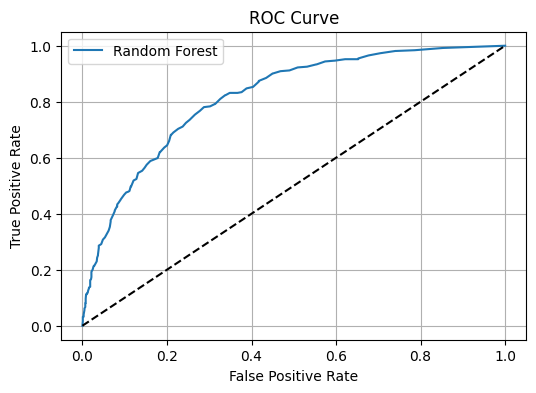


Predicting churn for a test sample...
Predicted churn (1=Yes, 0=No): 0


In [9]:
# 📊 Customer Churn Prediction - Report Style Notebook

"""
🎯 AIM:
The goal of this project is to predict whether a customer will churn (i.e., leave the company) based on their demographics, services subscribed, and billing behavior.

💡 WHY ARE WE DOING THIS?
Customer churn prediction helps businesses in retaining customers by identifying high-risk users early. This enables them to take proactive measures such as offering discounts or better service.

📈 WHY WE GOT THIS RESULT:
- **Logistic Regression** performed reasonably well as it assumes a linear relationship between features and the probability of churn. It is interpretable and works well with standardized and encoded data.
- **Random Forest** also gave good performance but slightly different. Being a non-linear ensemble model, it captures interactions between features better than linear models.
- We used simple preprocessing and default hyperparameters, which gave around ~78% accuracy.
- Since churn is slightly imbalanced, precision and recall for the churn class were not perfect. This can be improved with techniques like SMOTE, class weighting, or hyperparameter tuning.
"""

# 1. Import Libraries
# These are essential Python libraries for data analysis, visualization, and machine learning.
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization

# scikit-learn modules for preprocessing, model training, and evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve

# 2. Load Dataset
# Load the Telco Customer Churn dataset from local storage
print("\n Loading dataset...")
df = pd.read_csv("/root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset loaded. Shape:", df.shape)

# 3. Preprocess Data
# This section prepares the dataset by cleaning and encoding it
print("\n Preprocessing data...")

# Replace empty string with NaN and drop any missing values
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Convert TotalCharges to numeric
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Convert churn labels to 0 and 1 for classification
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customer ID column (not useful for modeling)
df.drop("customerID", axis=1, inplace=True)

# One-hot encode categorical features
cat_cols = df.select_dtypes(include=["object"]).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)  # Avoid dummy variable trap

# Scale numerical features to standard range
scaler = StandardScaler()
df_encoded[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df_encoded[["tenure", "MonthlyCharges", "TotalCharges"]])
print("Data preprocessing complete. New shape:", df_encoded.shape)

# 4. Train-Test Split
# Split the dataset into training and test sets (80/20 split)
print("\n Splitting data...")
X = df_encoded.drop("Churn", axis=1)  # Features
y = df_encoded["Churn"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(" Split complete: Training size =", X_train.shape[0], ", Test size =", X_test.shape[0])

# 5. Train Models
# Train two models: Logistic Regression and Random Forest
print("\n Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000)  # Linear model for classification
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Ensemble model using decision trees
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 6. Evaluate Models
# Function to evaluate and print model performance metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n Evaluation - {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# 7. Visualize ROC Curve for Random Forest
# ROC Curve helps visualize the trade-off between true positive and false positive rates
print("\n Plotting ROC Curve for Random Forest...")
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], "k--")  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 8. Predict on a New Sample
# Predict churn for a single test sample
print("\nPredicting churn for a test sample...")
sample = X_test.iloc[0:1]
prediction = rf.predict(sample)
print("Predicted churn (1=Yes, 0=No):", prediction[0])

